In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

Converted to 0 and 1 values of senior citizen to Yes/No


In [10]:
def conv(value):
  if value == 1:
    return "Yes"
  else:
    return "No"

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


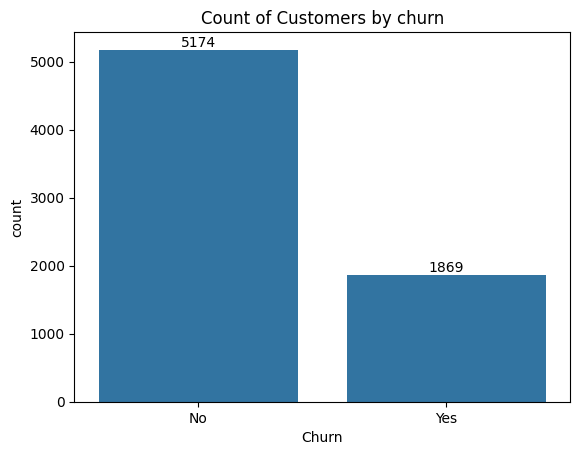

In [12]:
ax = sns.countplot(x='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title('Count of Customers by churn')
plt.show()

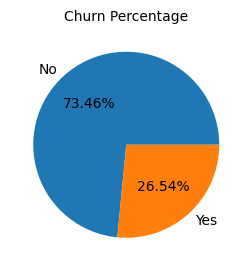

,Churn
Churn,
No,5174
Yes,1869


In [13]:
plt.figure(figsize=(3,6))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = '%1.2f%%')
plt.title("Churn Percentage", fontsize = 10)
plt.show()
gb

From the given pie chart we can conclude that 26.54% of our customers have churned out

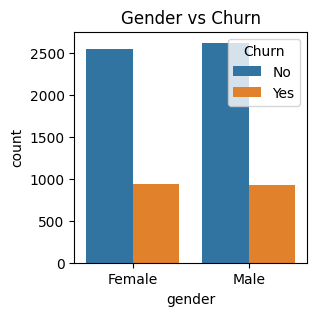

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x= "gender", data = df, hue= "Churn")
plt.title("Gender vs Churn")
plt.show()

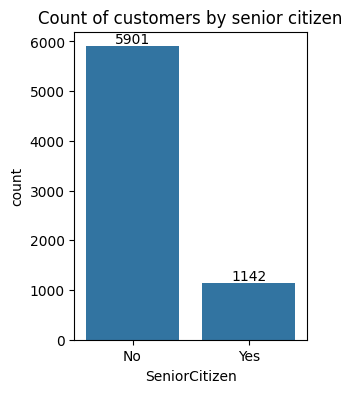

In [15]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by senior citizen")
plt.show()

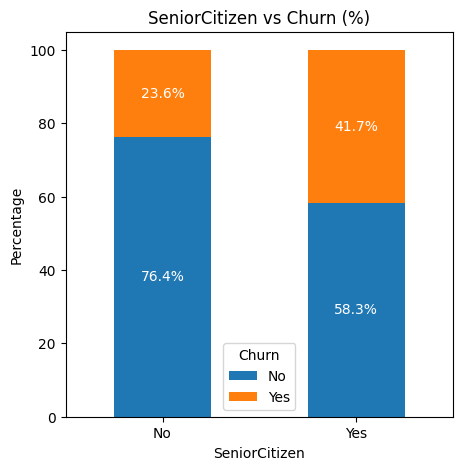

In [16]:
senior_citizen_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate the percentage
senior_citizen_churn_percentage = senior_citizen_churn.div(senior_citizen_churn.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = senior_citizen_churn_percentage.plot(kind='bar', stacked=True, figsize=(5,5), color=['#1f77b4', '#ff7f0e'])

# Add labels to the bars
for i in range(senior_citizen_churn_percentage.shape[0]):
    cumulative = 0  # Track cumulative height to place text correctly
    for j in range(senior_citizen_churn_percentage.shape[1]):
        percentage = senior_citizen_churn_percentage.iloc[i, j]
        if percentage > 0:  # Only label non-zero percentages
            ax.text(i, cumulative + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
        cumulative += percentage  # Update cumulative height for the next label

# Set the title and labels
plt.title('SeniorCitizen vs Churn (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.show()

Comparative a greater percentage of people in senior citizen category have changed

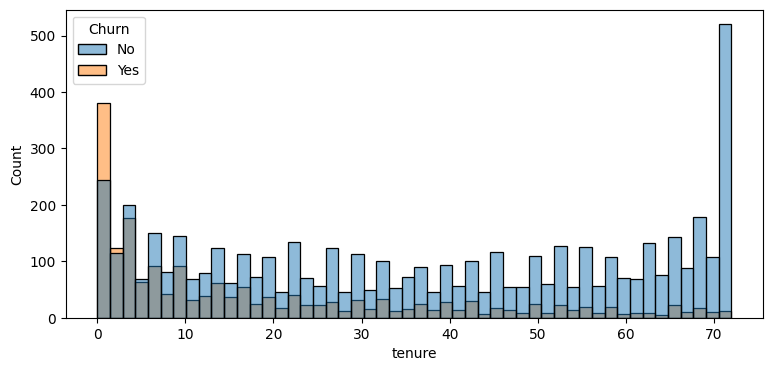

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df,bins =50, hue="Churn")
plt.show()

People who have used our services for a long time have stayed and people and people who used our services 1 or 2 months have churned

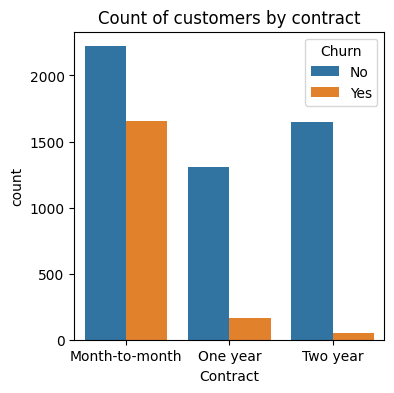

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x= "Contract", data = df, hue= "Churn")
plt.title("Count of customers by contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

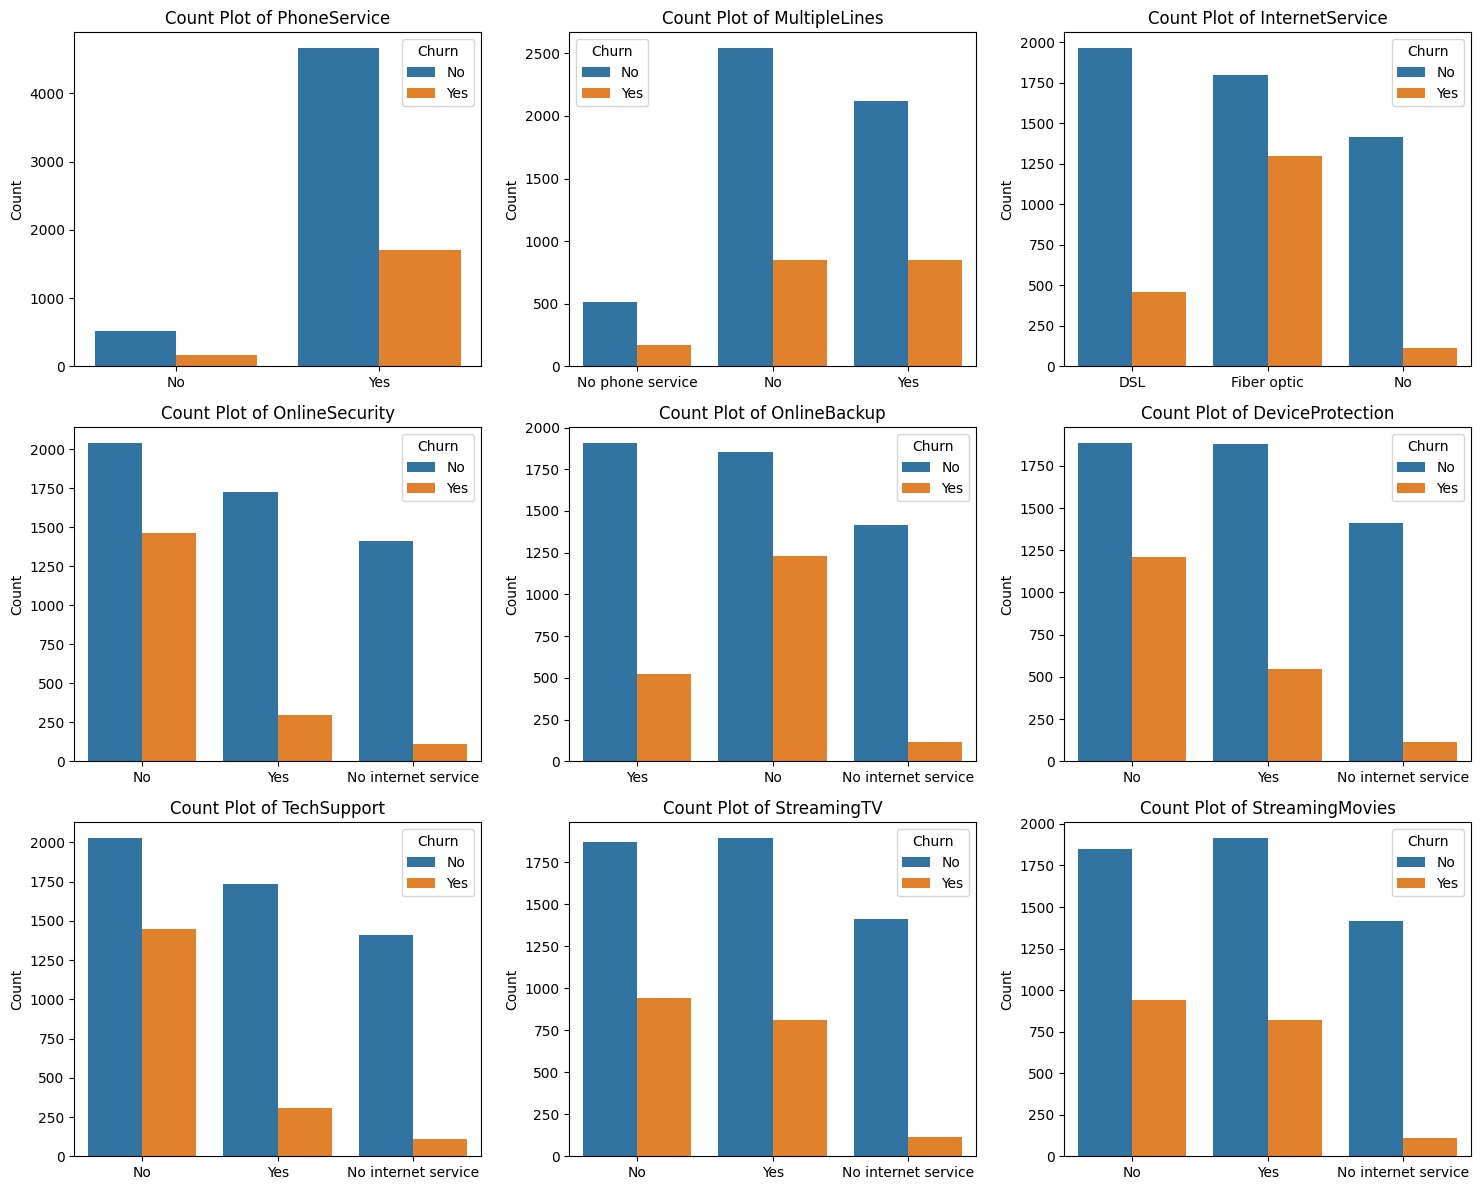

In [20]:
# List of the columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies']

# Set up the figure for subplots with a grid layout (3x3 in this case)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and axes to create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust the layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

Customers who did not use certain services (e.g., phone, online security, or streaming services) tended to have a higher churn rate, while those who were subscribed to more services were less likely to churn. The overall trend suggests that a lack of access to multiple services correlates with higher customer churn

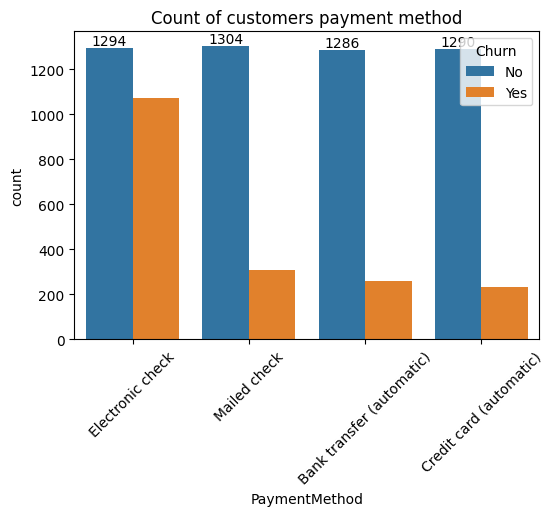

In [25]:
plt.figure(figsize=(6,4))
ax= sns.countplot(x= "PaymentMethod", data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers payment method")
plt.xticks(rotation = 45)
plt.show()

Customer is likely to churn when he is using electronic check as payment method